### Scikit-Learn: regresión lineal

En este notebook, entrenaremos un modelo simple de regresión lineal a partir de un dataset de rendimiento de estudiantes.

Se trata de uno de los modelos más simples, pero los pasos que se utilizan para entrenarlo son prácticamente idénticas para otros muchos modelos de aprendizaje supervisado (tanto de regresión, como de clasificación y clustering).

A partir de lo aprendido aquí, podríamos ejecutar otros modelos como _Regresión polinómica_, _SVM_ o _Random Forests_ inmediatamente sobre el mismo dataset (por supuesto, hay que tener cuidado con el _overfitting_!)

### Limpieza de datos

In [127]:
# Primero, importamos todo lo que vamos a necesitar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [128]:
# Y leemos el dataset
DATA_FOLDER = os.path.join("..", "data")
FILENAME = "student_performance.csv"
df = pd.read_csv(os.path.join(DATA_FOLDER, FILENAME))
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [129]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,4.898000,69.939000,6.51600,4.484000,55.408000
std,2.603916,17.339953,1.69783,2.811343,19.476984
min,1.000000,40.000000,4.00000,0.000000,10.000000
25%,3.000000,55.000000,5.00000,2.000000,40.750000
50%,5.000000,70.000000,7.00000,5.000000,56.000000
75%,7.000000,85.250000,8.00000,7.000000,71.000000
max,9.000000,99.000000,9.00000,9.000000,100.000000


In [130]:
# La variable que queremos predecir es "Performance Index"
df['Performance Index'].value_counts().sort_index()

Performance Index
10.0     1
12.0     1
14.0     1
15.0     3
16.0     2
        ..
95.0     2
96.0     2
97.0     1
98.0     1
100.0    1
Name: count, Length: 88, dtype: int64

In [131]:
# Existen variables que claramente ayudarán a predecir el performance index, como el número de horas de estudio
df['Hours Studied'].value_counts()


Hours Studied
1    136
3    122
5    116
8    112
7    108
6    108
4    103
9    102
2     93
Name: count, dtype: int64

In [132]:
# Extracurricular activities es una variable booleana (Si/No), aunque está en formato de string, luego veremos
# como tratarla
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     507
Yes    493
Name: count, dtype: int64

## Exploración de los datos
- La variable ```Performance Index``` es la que queremos predecir (variable objetivo). Para ello, usaremos el resto de variables del dataset en la medida de lo posible.
- Vamos a hacer algunos plots para ver que variables podrían ser más interesantes a simple vista

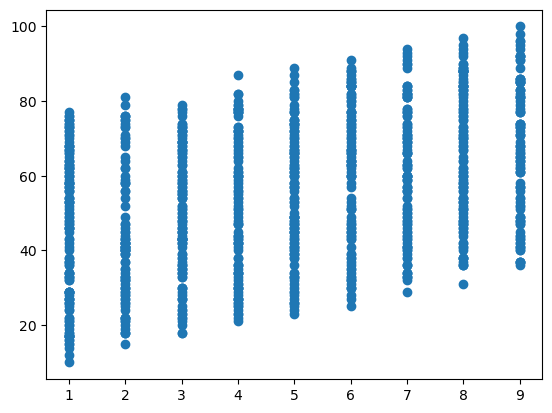

In [133]:
plt.scatter(df['Hours Studied'], df['Performance Index'])

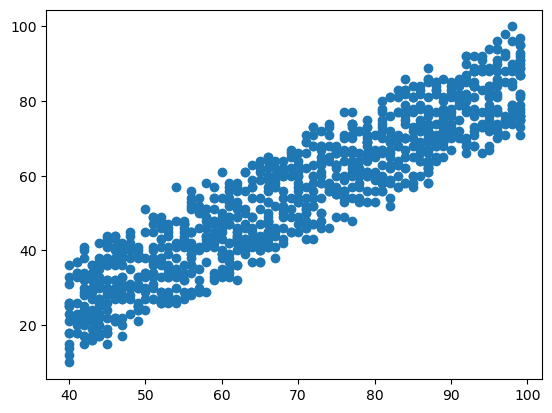

In [134]:
plt.scatter(df['Previous Scores'], df['Performance Index'])

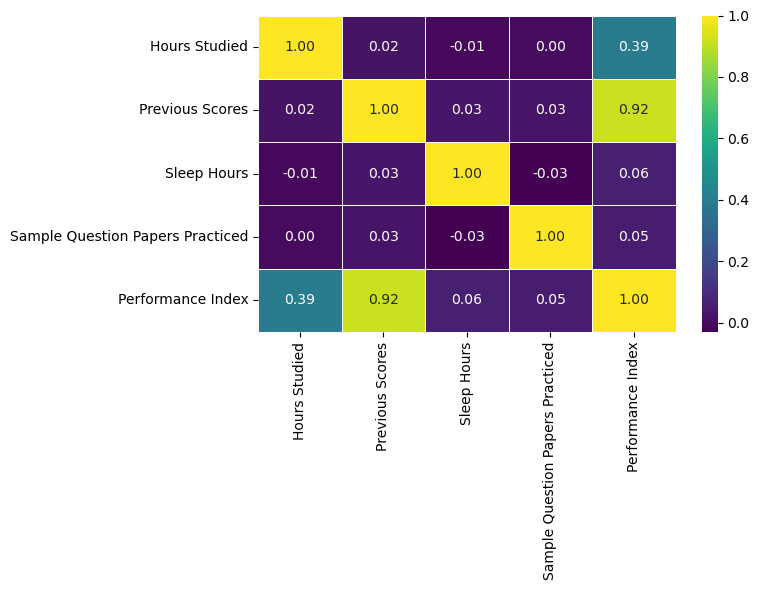

In [135]:
corr_data = df.drop("Extracurricular Activities", axis = 1)
correl = corr_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correl, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.tight_layout()
plt.show()

## Entrenamiento del modelo lineal
- Claramente, `Previous Score` es la columna más importante
- También hay algo de correlación con `Hours Studied`
- El resto de columnas no tienen prácticamente correlación, asi que no merece la pena incluirlas en un modelo lineal

In [136]:
# En primer lugar, dividimos los datos en variables explicativas y variable objetivo (X e y)
X = df[['Hours Studied', 'Previous Scores']]
y = df["Performance Index"]
X.head()

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75


In [137]:
# Y hacemos un train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [138]:
# También es necesario escalar los datos para centrarlos en torno al 0, lo cuál mejora el rendimiento del modelo
# Haciendo que ninguna variable sea más importante que otras por su escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [139]:
# Entrenamos el modelo
np.random.seed(42)
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [140]:
# Y sacamos las predicciones para el conjunto de prueba
y_pred = linear_reg.predict(x_test)


In [141]:
# Podemos calcular el R² para ver la precisión del modelo
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9877


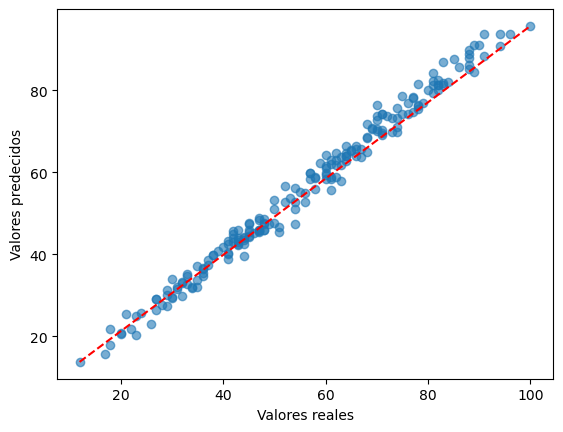

In [142]:
# Y ahora podemos plottear los valores predecidos frente a los reales
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Valores predecidos")
plt.show()

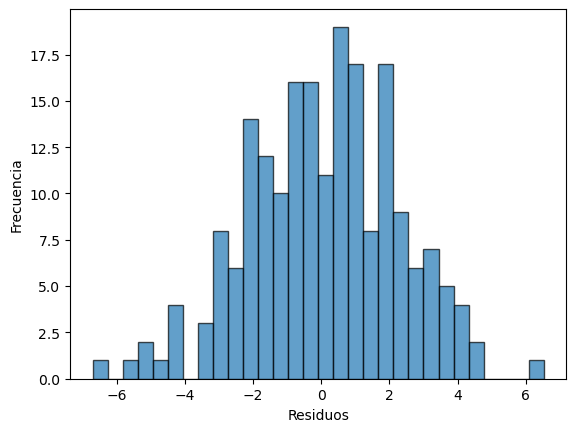

In [143]:
# O un histograma de los residuos
residuals = y_pred - y_test
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

### Pipelines

- Podemos agilizar el proceso de entrenamiento usando `Pipeline`
- Especificamos todos los pasos y solo ejecutamos un `fit()` y un `predict()`
- Muy útil para procesos más complicados

In [144]:
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours']]
y = df["Performance Index"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9893


### Trabajar con datos categóricos

- Por último, vamos a entrenar un modelo usando también las otras variables y la variable categórica
- Para ello, usamos `pd.get_dummies`

In [145]:
df = pd.get_dummies(df)
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,False,True
1,4,82,4,2,65.0,True,False
2,8,51,7,2,45.0,False,True
3,5,52,5,2,36.0,False,True
4,7,75,8,5,66.0,True,False
...,...,...,...,...,...,...,...
995,8,66,5,2,60.0,True,False
996,1,56,4,1,29.0,True,False
997,9,72,9,5,68.0,True,False
998,7,70,9,3,63.0,False,True


In [146]:
from sklearn.linear_model import Lasso # Otro modelo lineal, con regularización añadida
X = df.drop(columns='Performance Index')
y = df["Performance Index"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", Lasso())
])

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9823
